In [7]:
from pandas import read_csv

In [69]:
pwd

'/home/justin/.local/share/xdg/media/documents/textfiles/galvanize/slur-prediction/src'

In [9]:
data = read_csv('../data_with_n_grams.csv',nrows=500)

In [12]:
from sklearn.preprocessing import OneHotEncoder

Index(['author', 'body', 'sub_id', 'comment_id', 'subreddit', '2_gram',
       '3_gram', '4_gram'],
      dtype='object')

In [23]:
feature.shape

(500, 491)

In [17]:
enc.fit(data['2_gram'].values.reshape(-1,1))

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [18]:
feature = enc.transform(data['2_gram'].values.reshape(-1,1))



In [62]:
x = 2
for _ in range(1,33,3):
#     x**=2
    print(_,x**_)
x

1 2
4 16
7 128
10 1024
13 8192
16 65536
19 524288
22 4194304
25 33554432
28 268435456
31 2147483648


2

In [66]:
ndim = feature.shape[1]
from copy import deepcopy
def get_neuron_counts(n: int) -> list:
    out = []
    accumulator = 3
    while accumulator < n:
        out.append(accumulator)
        accumulator **= 2
    out = out[::-1]
    sub = deepcopy(out[:-1])
    out.extend(sub[::-1])
    return out

In [68]:
get_neuron_counts(ndim)

[81, 9, 3, 9, 81]

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation

In [44]:
def create_autoencoder(neuron_counts)
    model = Sequential([
        Dense(ndim,input_dim=ndim,activation='relu'),
       # Activation('relu'),
        Dense(256,activation='relu'),
       # Activation('relu'),
        Dense(16,activation='relu'),
      #  Activation('tanh'),
        Dense(4,activation='relu'),
      #  Activation('tanh'),
        Dense(2,activation='linear',name='bottleneck'),
      #  Activation('linear',name='bottleneck'),
        Dense(4,activation='relu'),
      #  Activation('tanh'),
        Dense(16,activation='relu'),
      #  Activation('relu'),
        Dense(256,activation='relu'),
       # Activation('relu'),
        Dense(ndim)    
    ])

In [45]:
model.compile(loss='mean_squared_error',optimizer='adam',verbose=1)

In [46]:
history=model.fit(feature.todense().astype(float),feature.todense().astype(float),batch_size=128,epochs=10)

Train on 500 samples
Epoch 1/10
500/500 [==============================] - 8s 16ms/sample - loss: 0.0020
Epoch 2/10
500/500 [==============================] - 0s 444us/sample - loss: 0.0020
Epoch 3/10
500/500 [==============================] - 0s 380us/sample - loss: 0.0020
Epoch 4/10
500/500 [==============================] - 0s 397us/sample - loss: 0.0020
Epoch 5/10
500/500 [==============================] - 0s 346us/sample - loss: 0.0020
Epoch 6/10
500/500 [==============================] - 0s 348us/sample - loss: 0.0020
Epoch 7/10
500/500 [==============================] - 0s 269us/sample - loss: 0.0020
Epoch 8/10
500/500 [==============================] - 0s 321us/sample - loss: 0.0020
Epoch 9/10
500/500 [==============================] - 0s 336us/sample - loss: 0.0020
Epoch 10/10
500/500 [==============================] - 0s 296us/sample - loss: 0.0020


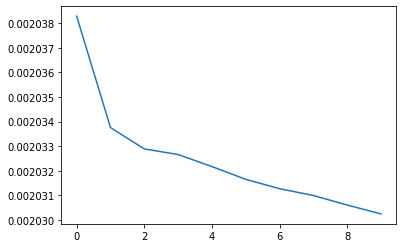

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 491)               241572    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               125952    
_________________________________________________________________
dense_11 (Dense)             (None, 16)                4112      
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_15 (Dense)             (None, 16)               

In [51]:
model.layers[4][feature[0].todense().astype(float)]

TypeError: 'Dense' object is not subscriptable

In [52]:
layer_outputs=[feature.todense().astype(float)]
for layer in model.layers:
    layer_outputs.append( layer( layer_outputs[-1] ) )



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [53]:
for i, ll in enumerate( layer_outputs ):
    print( "layer {} -- shape {}".format(i+1, ll.shape) )

layer 1 -- shape (500, 491)
layer 2 -- shape (500, 491)
layer 3 -- shape (500, 256)
layer 4 -- shape (500, 16)
layer 5 -- shape (500, 4)
layer 6 -- shape (500, 2)
layer 7 -- shape (500, 4)
layer 8 -- shape (500, 16)
layer 9 -- shape (500, 256)
layer 10 -- shape (500, 491)


In [57]:
layer_outputs[5]

<tf.Tensor: id=2771, shape=(500, 2), dtype=float32, numpy=
array([[ 0.00628065, -0.00896744],
       [ 0.00628065, -0.00896744],
       [ 0.00851696, -0.00354056],
       [ 0.00164961, -0.01630626],
       [-0.00116533, -0.02076709],
       [ 0.00628065, -0.00896744],
       [ 0.00419633, -0.01071405],
       [ 0.00501441, -0.01097406],
       [ 0.00628065, -0.00896744],
       [ 0.00628065, -0.00896744],
       [ 0.00437182, -0.01199236],
       [ 0.00549238, -0.01021662],
       [ 0.00963753,  0.00445831],
       [ 0.00570249, -0.0083591 ],
       [ 0.00594804, -0.00949454],
       [-0.00058731, -0.01985111],
       [ 0.00550198, -0.0102014 ],
       [ 0.00046543, -0.01818283],
       [ 0.01364609,  0.00890641],
       [ 0.00645177, -0.00855218],
       [ 0.00585181, -0.00964703],
       [ 0.00628065, -0.00896744],
       [ 0.00628065, -0.00896744],
       [ 0.00839744,  0.00142766],
       [ 0.00391639, -0.01271409],
       [ 0.00628065, -0.00896744],
       [ 0.00364558, -0.0131432